# 라이브러리를 불러옵니다

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 핑크색 warning 안내문 방지 
import warnings
warnings.filterwarnings('ignore')

# 한글폰트 사용을 위한 세팅

In [32]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(Colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())
plt.rc("axes", unicode_minus=False)

# 데이터 셋 로드 

In [3]:
import glob 

In [9]:
path = glob.glob('data/*.csv')
path

['data\\animal_raw.csv',
 'data\\fulldata_02_03_01_P_동물병원.csv',
 'data\\fulldata_02_03_05_P_동물장묘업.csv',
 'data\\sample.csv',
 'data\\가구원수별_반려동물_보유_유형별가구시도_20220621091829.csv',
 'data\\강원도_반려동물 동반관광 정보_20211221.csv',
 'data\\농림축산식품부_반려동물 미용업 현황_20201230.csv',
 'data\\반려동물등록현황.csv',
 'data\\병원 업종 카드데이터 1.csv',
 'data\\병원 업종 카드데이터 2.csv',
 'data\\서울동물복지지원센터 입양대기동물 현황.csv',
 'data\\서울시 동물병원 인허가 정보.csv',
 'data\\서울시 동물약국 인허가 정보.csv',
 'data\\서울시 동물용의료용구판매업 인허가 정보.csv',
 'data\\서울시 동물판매업 인허가 정보.csv',
 'data\\시도_인구동태건수_및_동태율_출생_사망_혼인_이혼__20220621184338.csv',
 'data\\온라인 카드소비트렌드 데이터 1.csv',
 'data\\온라인 카드소비트렌드 데이터 2.csv',
 'data\\유기동물보호현황.csv',
 'data\\출생아수__합계출산율__자연증가_등_20220621095936.csv',
 'data\\혼인건수__조혼인율_20220621100002.csv']

In [12]:
df = pd.read_csv(path[0], encoding = 'utf-8')
df

,크기(라벨링),나이,산책시간(시간),체중,성별
0,2,13,0.5,27.0,M
1,2,10,0.5,25.0,F
2,2,9,0.5,40.0,M
3,2,8,0.5,28.0,F
4,2,8,0.5,33.0,M
...,...,...,...,...,...
2083,2,2,1.5,25.0,F
2084,0,13,0.5,7.3,F
2085,0,5,1.5,5.0,F
2086,1,2,1.0,14.0,M


# 데이터 전처리 

In [13]:
#음수량 컬럼 새로 추가 (1kg 당 65ml)
df['음수량'] = df['체중'] * 65

## 레이블 인코딩 
- 카테고리 피쳐를 숫자형 값으로 변환해주자

In [15]:
from sklearn.preprocessing import LabelEncoder

In [20]:
#성별 컬럼 은 레이블 인코딩으로 변환을 진행해주자 
le = LabelEncoder()
le.fit(df['성별'])
le.transform(df['성별'])
df['성별'] = le.transform(df['성별'])

In [22]:
# 잘 변환 되었는지 확인해주기 
df.head()

,크기(라벨링),나이,산책시간(시간),체중,성별,음수량
0,2,13,0.5,27.0,1,1755.0
1,2,10,0.5,25.0,0,1625.0
2,2,9,0.5,40.0,1,2600.0
3,2,8,0.5,28.0,0,1820.0
4,2,8,0.5,33.0,1,2145.0


# 데이터 살펴보기 

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2088 entries, 0 to 2087
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   크기(라벨링)   2088 non-null   int64  
 1   나이        2088 non-null   int64  
 2   산책시간(시간)  2088 non-null   float64
 3   체중        2088 non-null   float64
 4   성별        2088 non-null   int32  
 5   음수량       2088 non-null   float64
dtypes: float64(3), int32(1), int64(2)
memory usage: 89.8 KB


In [24]:
df.describe()

,크기(라벨링),나이,산책시간(시간),체중,성별,음수량
count,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000
mean,0.483238,3.964559,0.913218,9.605642,0.582854,624.366715
std,0.747913,3.114288,0.265682,8.837653,0.509454,574.447416
min,0.000000,0.000000,0.500000,0.040000,0.000000,2.600000
25%,0.000000,2.000000,0.800000,3.600000,0.000000,234.000000
50%,0.000000,3.000000,1.000000,5.600000,1.000000,364.000000
75%,1.000000,5.000000,1.000000,13.000000,1.000000,845.000000
max,2.000000,18.000000,1.500000,60.000000,2.000000,3900.000000


In [27]:
#결측치 확인
df.isna().sum()

크기(라벨링)     0
나이          0
산책시간(시간)    0
체중          0
성별          0
음수량         0
dtype: int64

# Feature Selection

## 상관분석

In [28]:
df.corr()

,크기(라벨링),나이,산책시간(시간),체중,성별,음수량
크기(라벨링),1.000000,-0.161331,0.530170,0.930333,0.036343,0.930333
나이,-0.161331,1.000000,-0.414130,-0.133831,0.008496,-0.133831
산책시간(시간),0.530170,-0.414130,1.000000,0.543942,-0.005617,0.543942
체중,0.930333,-0.133831,0.543942,1.000000,0.054104,1.000000
성별,0.036343,0.008496,-0.005617,0.054104,1.000000,0.054104
음수량,0.930333,-0.133831,0.543942,1.000000,0.054104,1.000000


<AxesSubplot:>

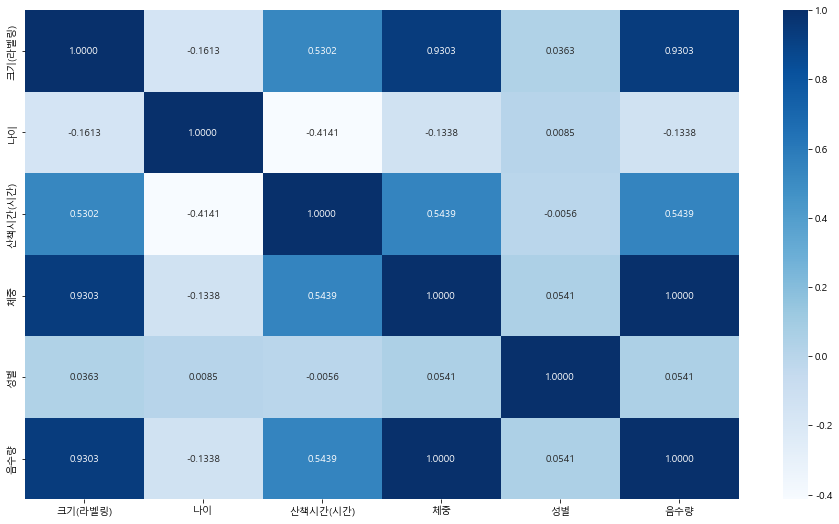

In [38]:
plt.figure(figsize = (16,9))

sns.heatmap(data = df.corr(),
           cmap = 'Blues', 
           annot = True, fmt = '0.4f')

# Feature Extraction

In [42]:
for column in df.columns:
    print(column)

크기(라벨링)
나이
산책시간(시간)
체중
성별
음수량


In [44]:
#반복문으로 출력되는 값은 각 컬럼들과 크기(라벨링)의 상관관계
for column in df.columns:
    print(df[column].corr(df['크기(라벨링)']))

1.0
-0.16133064527781685
0.5301702883751713
0.9303334166283616
0.036342786183672926
0.9303334166283624


In [54]:
#변수들으 상관계수를 전부 확인 하고 몇개의 변수를 몇개로 줄일 것인지 확인해보자 


corr_bar = []
for column in df.columns :
    print(f'{column}과 크기의 상관관계 : {df["크기(라벨링)"].corr(df[column])}\n')
    corr_bar.append(df["크기(라벨링)"].corr(df[column]))

크기(라벨링)과 크기의 상관관계 : 1.0

나이과 크기의 상관관계 : -0.16133064527781685

산책시간(시간)과 크기의 상관관계 : 0.5301702883751713

체중과 크기의 상관관계 : 0.9303334166283616

성별과 크기의 상관관계 : 0.036342786183672926

음수량과 크기의 상관관계 : 0.9303334166283623



<AxesSubplot:>

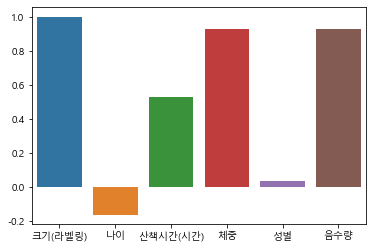

In [56]:
# barplot으로 수치형 피쳐를 df['크기(라벨링)']과의 상관관계 시각화 


sns.barplot(df.columns, corr_bar)

In [57]:
# df['나이'] & df['성별'] -> 수치형 데이터 중 비교적 상관관계가 낮음 


x = df[['나이', '성별']]
x.sample(2)

,나이,성별
963,2,1
1815,5,1


In [58]:
#pca를 위한 라이브러리 불러오기 -> sklearn

from sklearn.decomposition import PCA

In [59]:
# 위의 두 피쳐를 1개의 피쳐로 바꿔줄것임 

pca = PCA(n_components = 1)

In [60]:
# pca에 아까 만든 피쳐 2개의 조합 변수 x를 할당해 데이터를 학습시킨다.
pca.fit(x)

PCA(n_components=1)

In [61]:
# x = data[['dis','b']]을 학습시켜 PC1이라는 하나의 새로운 변수로 만듬
#새로운 변수에 담긴 각 변수의 분산을 확인 할 수 있다. 
pca.components_

array([[0.99999898, 0.001428  ]])

In [62]:
# 음 근데 나이가 99% 비중으로 담겼네... 흠... 재조정 고 ?

In [63]:
x.head()

,나이,성별
0,13,1
1,10,0
2,9,1
3,8,0
4,8,1


In [64]:
# 새로운 변수 PC1이 설명하는 분산의 비율
pca.explained_variance_ratio_

array([0.97393904])

In [66]:
#새로운 변수 PC1을 data['pc1'] 이라는 새로운 컬럼으로 추가해주자
df['pc1'] = pca.fit_transform(x)

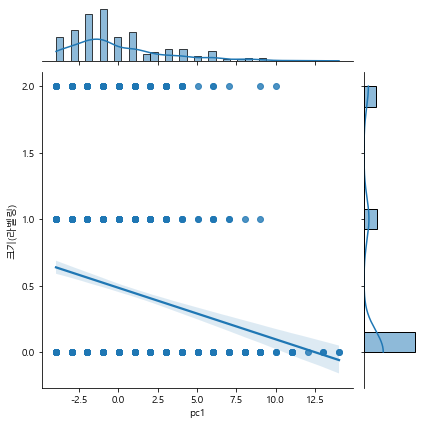

In [67]:
# data['pc1'] 과 data['medv']의 상관관계 확인해보기
sns.jointplot(data = df, x = 'pc1', y = '크기(라벨링)', kind = 'reg')

In [68]:
# data['pc1'] 과 data['medv']의 상관계수
df['pc1'].corr(df['크기(라벨링)'])

-0.161321831022012

In [ ]:
# 정규화로 비율 다시 조절해줘야 함 

# 정규화

In [69]:
# 정규화에 필요한 라이브러리 로드 

from sklearn.preprocessing import StandardScaler

In [70]:
# 정규화 객체를 만들어 줍니다 
scaler = StandardScaler()

In [71]:
# x를 학습 시킨 후 변형하여 정규화 된 x로 만들어 준다 
scaler.fit(x)

StandardScaler()

In [72]:
scaler_x = scaler.transform(x)

In [73]:
scaler_x  # 변형된 데이터들을 의미

array([[ 2.90198091,  0.81900593],
       [ 1.93844819, -1.14435156],
       [ 1.61727061,  0.81900593],
       ...,
       [ 0.33256031, -1.14435156],
       [-0.63097242,  0.81900593],
       [-0.63097242, -1.14435156]])

In [75]:
#  `PCA와 동일한 반복작업 수행`

In [74]:
#PCA의 갯수 찾기 
pca = PCA(n_components = 1)

#데이터 학습
pca.fit(scaler_x)

# 새로운 변수에 담긴 각 변수의 분산을 확인
# 위와 달라진 분산의 정도를 확인할 수 있습니다.
pca.components_

array([[0.70710678, 0.70710678]])

In [76]:
# 새로운 변수 PC1이 설명하는 분산의 비율입니다.
pca.explained_variance_ratio_

array([0.50424789])

In [78]:
# 위와 같이 pc1의 컬럼에 데이터를 넣어봅시다.
df['pc1'] = pca.fit_transform(scaler_x)

In [80]:
df.head()

,크기(라벨링),나이,산책시간(시간),체중,성별,음수량,pc1
0,2,13,0.5,27.0,1,1755.0,2.631135
1,2,10,0.5,25.0,0,1625.0,0.561511
2,2,9,0.5,40.0,1,2600.0,1.722708
3,2,8,0.5,28.0,0,1820.0,0.107297
4,2,8,0.5,33.0,1,2145.0,1.495601


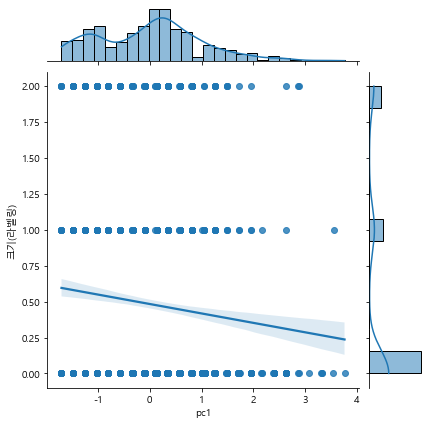

In [82]:
# 이전보다 상관성도 높아지고 pc1 바플랏도 조금 다듬어짐 
sns.jointplot(data = df, x = 'pc1', y='크기(라벨링)', kind='reg')

In [83]:
df['pc1'].corr(df['크기(라벨링)'])

-0.08800671099175277

<AxesSubplot:xlabel='나이', ylabel='Density'>

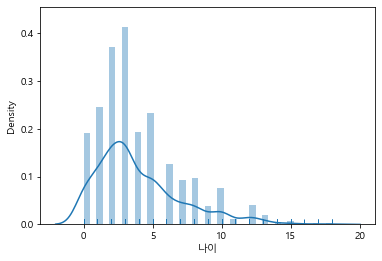

In [84]:
sns.distplot(x['나이'], kde=True, rug=True)

<AxesSubplot:xlabel='성별', ylabel='Density'>

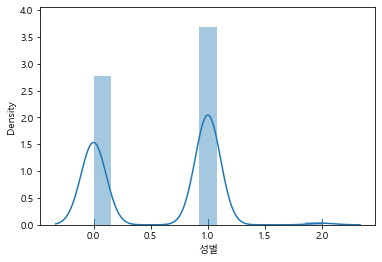

In [86]:
sns.distplot(x['성별'], kde=True, rug=True)

In [ ]:
# 성별이 범주형 변수라서 안되는건가 